In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import drive

# Carregar dados do PDAD e mostrar no formato dataframe
data = pd.read_csv('/content/drive/MyDrive/CD_II/pdad_2021/PDAD_2021-Moradores.csv', sep=';')
data.head(10)

<ipython-input-18-4502efbb4bba>:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/CD_II/pdad_2021/PDAD_2021-Moradores.csv', sep=';')


,A01nficha,A01ra,A01setor,morador_id,idade,E02_1,E02_2,E02_3,E03,E04,...,POP_AJUSTADA_PROJ,PESO_MOR,renda_ind,renda_ind_r,infla_ipcadf,E14_imput,id_genero,orientacao_sx,lgbtqiam,escolaridade
0,18196,27,53271,2,31,19900303,,99999,1,2,...,1289,"18,4142857142857","3909,59","3821,2174194585","0,977396723375225",1,1,2,2,7
1,18196,27,53271,1,38,19830607,,99999,1,1,...,1258,"18,231884057971","8796,57","8597,73919378163","0,977396723375225",1,1,2,2,7
2,54042,1,53013,1,31,19900214,,99999,1,1,...,839,"6,60629921259843",,,"0,947905545753782",1,1,2,2,7
3,54042,1,53013,2,30,19911125,,99999,1,2,...,1318,"9,02739726027397","0,00",0,"0,947905545753782",1,1,2,2,7
4,69697,20,53200,1,71,19491030,,99999,1,2,...,1037,"26,5897435897436","3878,94","3761,55016845096","0,969735810472492",0,1,2,2,7
5,20007,21,53210,1,47,19740331,,99999,2,1,...,1958,"26,8219178082192","247,77","245,560029113597","0,991080277502478",0,1,2,2,3
6,20007,21,53210,3,7,,,7,99999,1,...,2004,"31,3125",,,"0,991080277502478",0,99999,99999,99999,2
7,20007,21,53210,2,26,,,26,2,2,...,4087,"57,5633802816901","1189,30","1178,68813974527","0,991080277502478",0,1,2,2,8
8,53671,7,53070,1,26,,,26,2,1,...,3040,"46,060606060606","1532,42","1467,6982824622","0,957763763429622",1,1,2,2,1
9,19133,27,53272,2,40,19800917,,99999,1,1,...,979,"9,14953271028038","4459,86","4420,08052404475","0,991080277502478",1,1,2,2,7


In [19]:
# Carregar apenas as colunas 'idade','renda_ind','escolaridade','A01ra'
data = data.rename(columns={'A01ra': 'regAdm', 'E04':'sexo'})
# data = data[['sexo','idade','renda_ind','escolaridade','regAdm']]
# data.head(10)

# Pré-processamento
# Excluir registros duplicados
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Tratamento de outliers idade
data.idade.describe()
#print(data.idade.dtype)

# Retirar idade com valores abaixo de 18 e maiores de 80
data = data[data.idade >= 18]
data = data[data.idade <= 80]

# Tratamento de outliers renda
print(data.renda_ind.describe())
#print(data.renda_ind.dtype)

# Altera as vírgulas por pontos
data.renda_ind = data.renda_ind.str.replace(',', '.')

# Retirar os espaços
data.renda_ind = data.renda_ind.str.strip()

# Alterar os registros de renda nulos e vazios por 0
data['renda_ind'] = pd.to_numeric(data['renda_ind'], errors='coerce')
data['renda_ind'].fillna(0, inplace=True)
data['renda_ind'].replace('', 0)

# substituir os zeros pela média
# data['renda_ind'] = data['renda_ind'].replace(0, data['renda_ind'].mean())
# print(data.renda_ind.describe())

# Tratamento de outliers escolaridade
data.escolaridade.describe()
# print(data.escolaridade.dtype)

# Alterar os registros de escolaridade nulos e vazios por 0
# data['escolaridade'] = pd.to_numeric(data['escolaridade'], errors='coerce')
# data['renda_ind'].fillna(0, inplace=True)
# data['renda_ind'].replace('', 0)

# Padronização
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['idade','renda_ind','escolaridade','regAdm','sexo']])

count     65680
unique     3158
top            
freq      20406
Name: renda_ind, dtype: object


<ipython-input-19-9877451b9758>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['renda_ind'].fillna(0, inplace=True)


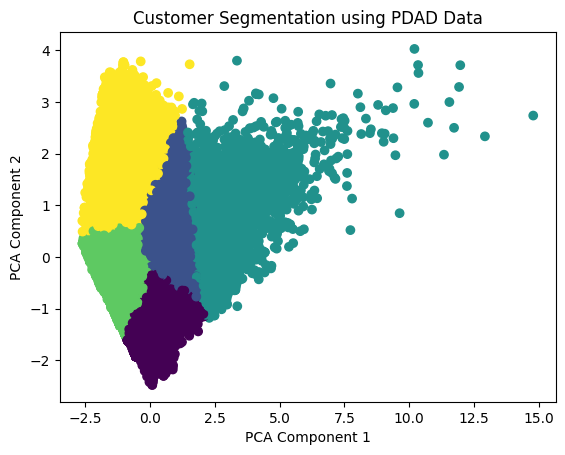

In [20]:
# PCA para redução de dimensionalidade
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#K-Means para segmentação
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_data)

#Adicionar clusters ao dataframe original
data['Cluster'] = clusters

#Visualização dos clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation using PDAD Data')
plt.show()

#Salvar resultados
data.to_csv('segmented_customers.csv', index=False)